In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import MinMaxScaler


In [2]:
# setting random state
np.random.seed(8)

In [29]:
# getting dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=5)

In [30]:
# Scaling

def scaling(x):
    x_min = np.amin(x, axis=0)
    x_max = np.amax(x, axis=0)
    return((x-x_min)/(x_max-x_min))


In [55]:
# kmeans clustering model

def k_means(X, k=3, epochs=100, threshold=0.0001):
    
    # scaling
    X = scaling(X)
    num_rows = X.shape[0]
    num_cols = X.shape[1]

    # getting inidtial centroids/centers
    center_indices =   np.random.choice(num_rows, size=k, replace=False)
    centers = X[center_indices, :]

    # creating iterations 
    for _ in range(epochs):
        # keeping track of elements in clusters
        labeled = {}
        for i in range(k):
            labeled[i] = []

        # assigning elements to the centroids 
        for row in X:
            current_row = row
            distances = []
            for center in centers:
                distances.append(np.linalg.norm(current_row-center))
            its_center = distances.index(min(distances))
            labeled[its_center].append(current_row)

        # new updated centroids
        new_centers = np.empty(shape=(k, num_cols))
        for center in range(k):
            new_centers[center] = np.average(labeled[center], axis=0)

        # checking threshold
        # if np.centers-new_centers
    
    centers = new_centers
    
    return new_centers , labeled


    


In [56]:
centroid, labeled = k_means(X)

In [57]:
centroid

array([[0.14742475, 0.70738299, 0.14405932, 0.49714337, 0.57707512],
       [0.6177278 , 0.18069756, 0.21532788, 0.78657282, 0.55061262],
       [0.8753417 , 0.7143372 , 0.8861576 , 0.32723462, 0.39244775]])

In [36]:
centers

array([[0.14742475, 0.70738299, 0.14405932, 0.49714337, 0.57707512],
       [0.6177278 , 0.18069756, 0.21532788, 0.78657282, 0.55061262],
       [0.8753417 , 0.7143372 , 0.8861576 , 0.32723462, 0.39244775]])

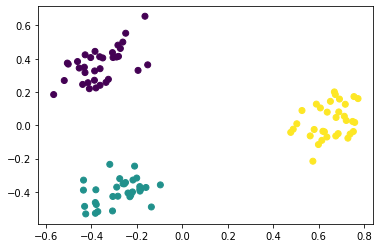

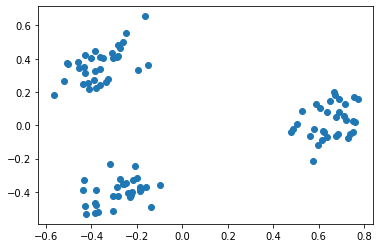

In [44]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(X)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

In [ ]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)